<a href="https://colab.research.google.com/github/vmdvaldez/WeatherImageClassification/blob/master/VGG_Transfer_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive
!rm -rf /root/datasets
!mkdir /root/datasets

In [4]:
Archive('/content/drive/My Drive/Image.rar').extractall('/root/datasets')

In [5]:
!pip install split-folders

In [6]:
import split_folders
# Put them in a ratio of 80, 10, 10 in a folder called /root/datasets/Lab_3b_Gesture_Dataset_output
split_folders.ratio('/root/datasets/Image', output="/root/datasets/Image_output", seed=1337, ratio=(.7, .15, .15)) # default values

Copying files: 8408 files [00:01, 7695.68 files/s]


In [9]:
!pip3 install Pillow

In [8]:
!ln -s "/content/drive/My Drive/" "/bbbb"
!cp /bbbb/augment_images.sh /root
!cp /bbbb/data_augment.py /root

In [10]:
!bash /root/augment_images.sh

Streaming output truncated to the last 5000 lines.
/root/datasets/Image_output/train/snow/612555427.jpg
/root/datasets/Image_output/train/snow/3267102523.jpg
/root/datasets/Image_output/train/snow/3185484154.jpg
/root/datasets/Image_output/train/snow/101.jpg
/root/datasets/Image_output/train/snow/3199231793.jpg
/root/datasets/Image_output/train/snow/2080572010mir.jpg
/root/datasets/Image_output/train/snow/3332094565.jpg
/root/datasets/Image_output/train/snow/2227104392.jpg
/root/datasets/Image_output/train/snow/386mir.jpg
/root/datasets/Image_output/train/snow/2354440352mir.jpg
/root/datasets/Image_output/train/snow/2084401317.jpg
/root/datasets/Image_output/train/snow/3267269493mir.jpg
/root/datasets/Image_output/train/snow/3995883mir.jpg
/root/datasets/Image_output/train/snow/3200155828mir.jpg
/root/datasets/Image_output/train/snow/3305924879.jpg
/root/datasets/Image_output/train/snow/2387664590.jpg
/root/datasets/Image_output/train/snow/78069324mir.jpg
/root/datasets/Image_output/tr

In [11]:
import time
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms

In [13]:
# define training and test data directories
data_dir = '/root/datasets/Image_output'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'val/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
classes = ['cloudy', 'foggy', 'rain', 'snow', 'sunny']

In [14]:
# load and transform data using ImageFolder

# resize all images to 224 x 224
data_transform = transforms.Compose([transforms.Resize((224,224)),
                                    transforms.ToTensor()])


train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(val_data))
print('Num test images: ', len(test_data))

Num training images:  23532
Num validation images:  1258
Num test images:  1267


In [29]:
# vgg
import torchvision.models

vggnet = torchvision.models.vgg16(pretrained=True)

In [31]:
# Save Features to Folder (assumes code from 1. has been evaluated)

import os
import torchvision.models
Lenet = torchvision.models.googlenet(pretrained=True)

# location on Google Drive
train_path = '/content/drive/My Drive/Colab Notebooks/Project/Features/Train'
val_path = '/content/drive/My Drive/Colab Notebooks/Project/Features/Val'
test_path = '/content/drive/My Drive/Colab Notebooks/Project/Features/Test'

# Prepare Dataloader (requires code from 1.)
batch_size = 1 # save 1 file at a time, hence batch_size = 1
num_workers = 1
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
classes = ['cloudy', 'foggy', 'rain', 'snow', 'sunny']

# save features to folder as tensors
n = 0
for img, label in train_loader:
  features = vggnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = train_path + '/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n += 1

# save features to folder as tensors
n = 0
for img, label in val_loader:
  features = vggnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = val_path + '/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n += 1

# save features to folder as tensors
n = 0
for img, label in test_loader:
  features = vggnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = test_path + '/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n += 1

In [32]:
# Load Tensor Files (features) from folder

# location on Google Drive
train_path = '/content/drive/My Drive/Colab Notebooks/Project/Features/Train'
val_path = '/content/drive/My Drive/Colab Notebooks/Project/Features/Val'
test_path = '/content/drive/My Drive/Colab Notebooks/Project/Features/Test'

!ln -s "/content/drive/My Drive/Colab Notebooks/" "/cccc"

!rm -rf /root/Train
!rm -rf /root/Val
!rm -rf /root/Test
!rm -rf /aaaa/Project/Features

!cp -a /cccc/Project/Features /root

train_path = "/root/Features/Train"
val_path = "/root/Features/Val"
test_path = "/root/Features/Test"

#load features
# location on Google Drive
train_dataset = torchvision.datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))
val_dataset = torchvision.datasets.DatasetFolder(val_path, loader=torch.load, extensions=('.tensor'))
test_dataset = torchvision.datasets.DatasetFolder(test_path, loader=torch.load, extensions=('.tensor'))

# Prepare Dataloader
batch_size = 1024
num_workers = 1
train_feature_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_feature_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_feature_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

# Verification Step - obtain one batch of features
dataiter = iter(train_feature_loader)
features, labels = dataiter.next()
print(features.shape)
print(labels.shape)

torch.Size([1024, 512, 7, 7])
torch.Size([1024])


In [34]:
def get_accuracy(model, data_loader, conf_matrix=False):
    # calculate total correct predictions within the specified data_set

    
#     classes = ['cloudy', 'foggy', 'rain', 'snow', 'sunny', 'z-other']
    classes = ['cloudy', 'foggy', 'rain', 'snow', 'sunny']
    
    x = np.zeros(shape=(len(classes), len(classes)))
#     print(x.shape)

    l = 0
    correct, total = 0 , 0
    for images, labels in data_loader:
        
#         if l > 10000:
#             break
        
        images = images.cuda()
        labels = labels.cuda()
        
        outputs = model(images)
        
        pred = outputs.max(1, keepdim=True)[1]
        
        if conf_matrix:
            i = labels.view_as(pred).item()
            j = pred.item()
            x[i][j] += 1
            
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += images.shape[0]
        
        l+=1
    if conf_matrix:
        return (correct / total), x
    else:
        return (correct / total)

In [35]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [100]:
def train2(model, train_loader, val_loader, batch_size=1024, num_epochs=1):
    #train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    # train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           #num_workers=num_workers, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.015, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        mini_b=0
        mini_batch_correct = 0
        Mini_batch_total = 0
        for imgs, labels in iter(train_loader):
          
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

          #### ALNC is alexNet.features (AlexNet without classifier) ####
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch



            ##### Mini_batch Accuracy ##### We don't compute accuracy on the whole trainig set in every iteration!
            pred = out.max(1, keepdim=True)[1]
            mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
            Mini_batch_total = imgs.shape[0]
            train_acc.append((mini_batch_correct / Mini_batch_total))
           ###########################

          # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
            #val_loss.append(evaluate(model, val_loader, criterion))
            n += 1
            mini_b += 1
            print("Iteration: ",n,'Progress: % 6.2f ' % ((epoch * len(train_loader) + mini_b) / (num_epochs * len(train_loader))*100),'%', "Time Elapsed: % 6.2f s " % (time.time()-start_time))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name("CNNClassifier4", batch_size, 0.015, epoch)
        new_path = "/content/drive/My Drive/Project_VGG/" + model_path 
        torch.save(model.state_dict(), new_path)
        torch.save(model.state_dict(), model_path)
            
        print("Epoch %d Finished. " % epoch ,"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))
        print(epoch, train_acc[-1], val_acc[-1])


    end_time= time.time()
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    #plt.plot(iters, val_loss, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")    
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()

    train_acc.append(get_accuracy(model, train_loader))
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print ("Total time:  % 6.2f s  Time per Epoch: % 6.2f s " % ( (end_time-start_time), ((end_time-start_time) / num_epochs) ))
    

In [38]:
torch.manual_seed(1) # set the random seed

class CNNClassifier5(nn.Module):
    def __init__(self):
        super(CNNClassifier5, self).__init__()
        self.conv1 = nn.Conv2d(512, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(5*2*2, 64)
        self.fc2 = nn.Linear(64, 5)

    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = x.view(-1, 5*2*2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

CUDA is available!  Training on GPU ...
Iteration:  1 Progress:   0.11  % Time Elapsed:   0.70 s 
Iteration:  2 Progress:   0.22  % Time Elapsed:   1.10 s 
Iteration:  3 Progress:   0.33  % Time Elapsed:   1.52 s 
Iteration:  4 Progress:   0.43  % Time Elapsed:   1.90 s 
Iteration:  5 Progress:   0.54  % Time Elapsed:   2.29 s 
Iteration:  6 Progress:   0.65  % Time Elapsed:   2.67 s 
Iteration:  7 Progress:   0.76  % Time Elapsed:   3.07 s 
Iteration:  8 Progress:   0.87  % Time Elapsed:   3.45 s 
Iteration:  9 Progress:   0.98  % Time Elapsed:   3.85 s 
Iteration:  10 Progress:   1.09  % Time Elapsed:   4.23 s 
Iteration:  11 Progress:   1.20  % Time Elapsed:   4.60 s 
Iteration:  12 Progress:   1.30  % Time Elapsed:   4.99 s 
Iteration:  13 Progress:   1.41  % Time Elapsed:   5.38 s 
Iteration:  14 Progress:   1.52  % Time Elapsed:   5.76 s 
Iteration:  15 Progress:   1.63  % Time Elapsed:   6.15 s 
Iteration:  16 Progress:   1.74  % Time Elapsed:   6.55 s 
Iteration:  17 Progress: 

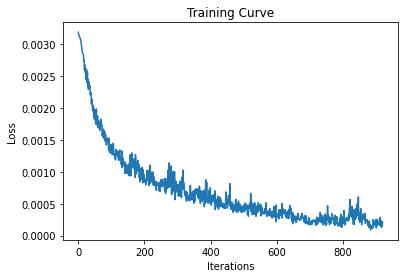

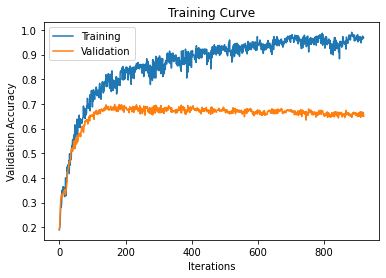

Final Training Accuracy: 0.9796447390787013
Final Validation Accuracy: 0.6494435612082671
Total time:   363.61 s  Time per Epoch:  18.18 s 


In [41]:
use_cuda = True

model =CNNClassifier5()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

# Prepare Dataloader
batch_size = 512
num_workers = 1
train_feature_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_feature_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_feature_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

#proper model
train2(model, train_feature_loader, val_feature_loader, num_epochs=20)

In [68]:
def get_accuracy(model, data_loader, conf_matrix=False):
    # calculate total correct predictions within the specified data_set

    classes = ['cloudy', 'foggy', 'rain', 'snow', 'sunny']
    
    x = np.zeros(shape=(len(classes), len(classes)))

    l = 0
    correct, total = 0 , 0
    for images, labels in data_loader:
        
        images = images.cuda()
        labels = labels.cuda()
        
        outputs = model(images)
        
        pred = outputs.max(1, keepdim=True)[1]
        
        if conf_matrix:
            for k in range(labels.cpu().shape[0]):
              i = labels.view_as(pred)[k]
              j = pred.cpu()[k]
              x[i][j] += 1
            
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += images.shape[0]
        
        l+=1
    if conf_matrix:
        return (correct / total), x
    else:
        return (correct / total)

In [44]:
def print_conf_matrix(conf_matrix):
    print("\n\n")

    classes = ['cloudy', 'foggy', 'rain', 'snow', 'sunny']

    for i in range(len(classes)):
        if i == 0:
            print('', end='\t')

        print(classes[i], end = '\t')

    print('\n')

    for i in range(len(classes)):

        print(classes[i], end ='\t')
        for j in range(len(classes)):
            print(conf_matrix[i][j], end='\t')
        print('\n')

In [45]:
x, y = get_accuracy(model, val_feature_loader, conf_matrix=True)
print(x)
print_conf_matrix(y)

0.6494435612082671



	cloudy	foggy	rain	snow	sunny	

cloudy	163.0	11.0	45.0	10.0	44.0	

foggy	17.0	171.0	15.0	11.0	5.0	

rain	41.0	5.0	168.0	15.0	24.0	

snow	14.0	16.0	48.0	163.0	17.0	

sunny	68.0	7.0	17.0	11.0	152.0	



In [46]:
x, y = get_accuracy(model, train_feature_loader, conf_matrix=True)
print(x)
print_conf_matrix(y)

0.9796447390787013



	cloudy	foggy	rain	snow	sunny	

cloudy	4981.0	15.0	33.0	5.0	78.0	

foggy	19.0	4020.0	41.0	11.0	9.0	

rain	10.0	0.0	4696.0	2.0	12.0	

snow	34.0	12.0	83.0	4674.0	25.0	

sunny	81.0	2.0	5.0	2.0	4682.0	



In [47]:
x, y = get_accuracy(model, test_feature_loader, conf_matrix=True)
print(x)
print_conf_matrix(y)

0.6835043409629045



	cloudy	foggy	rain	snow	sunny	

cloudy	181.0	3.0	30.0	10.0	51.0	

foggy	19.0	175.0	13.0	10.0	4.0	

rain	37.0	7.0	168.0	18.0	24.0	

snow	21.0	10.0	37.0	182.0	10.0	

sunny	57.0	6.0	22.0	12.0	160.0	



In [54]:
torch.manual_seed(1) # set the random seed

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(512, 10, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(10*2*2, 64)
        self.fc2 = nn.Linear(64, 5)

    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = x.view(-1, 10*2*2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

CUDA is available!  Training on GPU ...
Iteration:  1 Progress:   0.22  % Time Elapsed:   0.77 s 
Iteration:  2 Progress:   0.43  % Time Elapsed:   1.26 s 
Iteration:  3 Progress:   0.65  % Time Elapsed:   1.72 s 
Iteration:  4 Progress:   0.87  % Time Elapsed:   2.18 s 
Iteration:  5 Progress:   1.09  % Time Elapsed:   2.64 s 
Iteration:  6 Progress:   1.30  % Time Elapsed:   3.13 s 
Iteration:  7 Progress:   1.52  % Time Elapsed:   3.58 s 
Iteration:  8 Progress:   1.74  % Time Elapsed:   4.03 s 
Iteration:  9 Progress:   1.96  % Time Elapsed:   4.51 s 
Iteration:  10 Progress:   2.17  % Time Elapsed:   4.96 s 
Iteration:  11 Progress:   2.39  % Time Elapsed:   5.42 s 
Iteration:  12 Progress:   2.61  % Time Elapsed:   5.87 s 
Iteration:  13 Progress:   2.83  % Time Elapsed:   6.34 s 
Iteration:  14 Progress:   3.04  % Time Elapsed:   6.79 s 
Iteration:  15 Progress:   3.26  % Time Elapsed:   7.24 s 
Iteration:  16 Progress:   3.48  % Time Elapsed:   7.69 s 
Iteration:  17 Progress: 

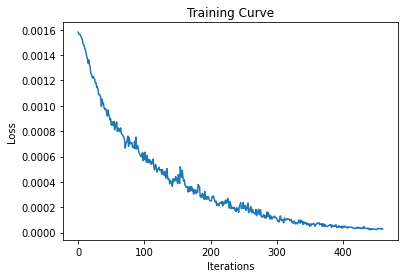

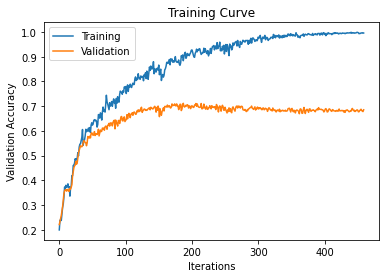

Final Training Accuracy: 0.9973227944926059
Final Validation Accuracy: 0.685214626391097
Total time:   217.35 s  Time per Epoch:  10.87 s 


In [56]:
use_cuda = True

model =CNNClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

# Prepare Dataloader
batch_size = 1024
num_workers = 1
train_feature_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_feature_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_feature_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

#proper model
train2(model, train_feature_loader, val_feature_loader, num_epochs=20)

In [66]:
model =CNNClassifier()
model_path =  "/content/model_CNNClassifier5_bs1024_lr0.015_epoch8"
model.load_state_dict(torch.load(model_path))
model.eval()
x, y = get_accuracy(model, val_feature_loader, conf_matrix=True)
print(x)
print_conf_matrix(y)

0.7106518282988871



	cloudy	foggy	rain	snow	sunny	

cloudy	184.0	14.0	26.0	17.0	32.0	

foggy	14.0	179.0	13.0	9.0	4.0	

rain	38.0	8.0	178.0	15.0	14.0	

snow	16.0	14.0	26.0	190.0	12.0	

sunny	59.0	4.0	16.0	13.0	163.0	



In [67]:
model =CNNClassifier()
model_path =  "/content/model_CNNClassifier5_bs1024_lr0.015_epoch8"
model.load_state_dict(torch.load(model_path))
model.eval()
x, y = get_accuracy(model, test_feature_loader, conf_matrix=True)
print(x)
print_conf_matrix(y)

0.7048145224940805



	cloudy	foggy	rain	snow	sunny	

cloudy	173.0	4.0	26.0	15.0	57.0	

foggy	16.0	181.0	8.0	9.0	7.0	

rain	38.0	10.0	171.0	21.0	14.0	

snow	16.0	11.0	28.0	197.0	8.0	

sunny	53.0	0.0	24.0	9.0	171.0	



In [70]:
torch.manual_seed(1) # set the random seed

class CNNClassifier2(nn.Module):
    def __init__(self):
        super(CNNClassifier2, self).__init__()
        self.conv1 = nn.Conv2d(512, 30, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(30*2*2, 124)
        self.fc2 = nn.Linear(124, 64)
        self.fc3 = nn.Linear(64, 5)
        
    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = x.view(-1, 30*2*2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

CUDA is available!  Training on GPU ...
Iteration:  1 Progress:   0.22  % Time Elapsed:   0.79 s 
Iteration:  2 Progress:   0.43  % Time Elapsed:   1.26 s 
Iteration:  3 Progress:   0.65  % Time Elapsed:   1.71 s 
Iteration:  4 Progress:   0.87  % Time Elapsed:   2.15 s 
Iteration:  5 Progress:   1.09  % Time Elapsed:   2.61 s 
Iteration:  6 Progress:   1.30  % Time Elapsed:   3.05 s 
Iteration:  7 Progress:   1.52  % Time Elapsed:   3.49 s 
Iteration:  8 Progress:   1.74  % Time Elapsed:   3.93 s 
Iteration:  9 Progress:   1.96  % Time Elapsed:   4.38 s 
Iteration:  10 Progress:   2.17  % Time Elapsed:   4.84 s 
Iteration:  11 Progress:   2.39  % Time Elapsed:   5.30 s 
Iteration:  12 Progress:   2.61  % Time Elapsed:   5.77 s 
Iteration:  13 Progress:   2.83  % Time Elapsed:   6.22 s 
Iteration:  14 Progress:   3.04  % Time Elapsed:   6.68 s 
Iteration:  15 Progress:   3.26  % Time Elapsed:   7.12 s 
Iteration:  16 Progress:   3.48  % Time Elapsed:   7.58 s 
Iteration:  17 Progress: 

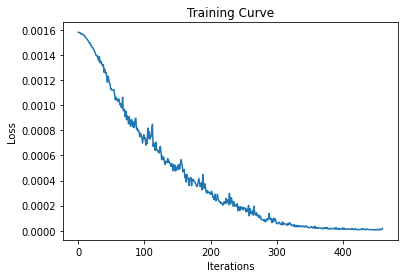

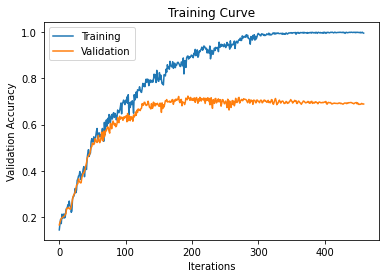

Final Training Accuracy: 0.9994475607683155
Final Validation Accuracy: 0.6891891891891891
Total time:   222.67 s  Time per Epoch:  11.13 s 


In [72]:
use_cuda = True

model =CNNClassifier2()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

# Prepare Dataloader
batch_size = 1024
num_workers = 1
train_feature_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_feature_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_feature_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

#proper model
train2(model, train_feature_loader, val_feature_loader, num_epochs=20)

In [98]:
torch.manual_seed(1) # set the random seed

class CNNClassifier3(nn.Module):
    def __init__(self):
        super(CNNClassifier3, self).__init__()
        self.conv1 = nn.Conv2d(512, 30, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(30*2*2, 64)
        self.fc2 = nn.Linear(64, 5)
        
    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = x.view(-1, 30*2*2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

CUDA is available!  Training on GPU ...
Iteration:  1 Progress:   0.22  % Time Elapsed:   0.77 s 
Iteration:  2 Progress:   0.43  % Time Elapsed:   1.24 s 
Iteration:  3 Progress:   0.65  % Time Elapsed:   1.70 s 
Iteration:  4 Progress:   0.87  % Time Elapsed:   2.16 s 
Iteration:  5 Progress:   1.09  % Time Elapsed:   2.63 s 
Iteration:  6 Progress:   1.30  % Time Elapsed:   3.08 s 
Iteration:  7 Progress:   1.52  % Time Elapsed:   3.55 s 
Iteration:  8 Progress:   1.74  % Time Elapsed:   3.99 s 
Iteration:  9 Progress:   1.96  % Time Elapsed:   4.45 s 
Iteration:  10 Progress:   2.17  % Time Elapsed:   4.92 s 
Iteration:  11 Progress:   2.39  % Time Elapsed:   5.36 s 
Iteration:  12 Progress:   2.61  % Time Elapsed:   5.83 s 
Iteration:  13 Progress:   2.83  % Time Elapsed:   6.29 s 
Iteration:  14 Progress:   3.04  % Time Elapsed:   6.74 s 
Iteration:  15 Progress:   3.26  % Time Elapsed:   7.18 s 
Iteration:  16 Progress:   3.48  % Time Elapsed:   7.65 s 
Iteration:  17 Progress: 

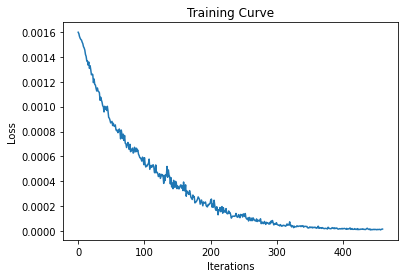

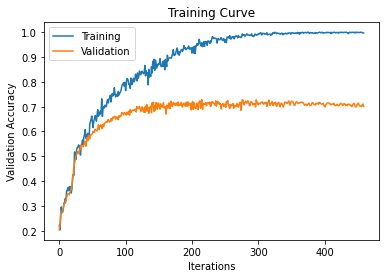

Final Training Accuracy: 0.9991500934897162
Final Validation Accuracy: 0.7011128775834659
Total time:   217.71 s  Time per Epoch:  10.89 s 


In [99]:
use_cuda = True

model =CNNClassifier3()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

# Prepare Dataloader
batch_size = 1024
num_workers = 1
train_feature_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_feature_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_feature_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

#proper model
train2(model, train_feature_loader, val_feature_loader, num_epochs=20)

In [111]:
torch.manual_seed(1) # set the random seed

class CNNClassifier4(nn.Module):
    def __init__(self):
        super(CNNClassifier4, self).__init__()
        self.conv1 = nn.Conv2d(512,50, 3)
        self.fc1 = nn.Linear(50*5*5, 64)
        self.fc2 = nn.Linear(64, 5)
        
    def forward(self, img):
        x = F.relu(self.conv1(img))
        x = x.view(-1, 50*5*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

CUDA is available!  Training on GPU ...
Iteration:  1 Progress:   0.22  % Time Elapsed:   0.79 s 
Iteration:  2 Progress:   0.43  % Time Elapsed:   1.25 s 
Iteration:  3 Progress:   0.65  % Time Elapsed:   1.71 s 
Iteration:  4 Progress:   0.87  % Time Elapsed:   2.17 s 
Iteration:  5 Progress:   1.09  % Time Elapsed:   2.63 s 
Iteration:  6 Progress:   1.30  % Time Elapsed:   3.11 s 
Iteration:  7 Progress:   1.52  % Time Elapsed:   3.56 s 
Iteration:  8 Progress:   1.74  % Time Elapsed:   4.02 s 
Iteration:  9 Progress:   1.96  % Time Elapsed:   4.47 s 
Iteration:  10 Progress:   2.17  % Time Elapsed:   4.93 s 
Iteration:  11 Progress:   2.39  % Time Elapsed:   5.40 s 
Iteration:  12 Progress:   2.61  % Time Elapsed:   5.86 s 
Iteration:  13 Progress:   2.83  % Time Elapsed:   6.32 s 
Iteration:  14 Progress:   3.04  % Time Elapsed:   6.79 s 
Iteration:  15 Progress:   3.26  % Time Elapsed:   7.24 s 
Iteration:  16 Progress:   3.48  % Time Elapsed:   7.72 s 
Iteration:  17 Progress: 

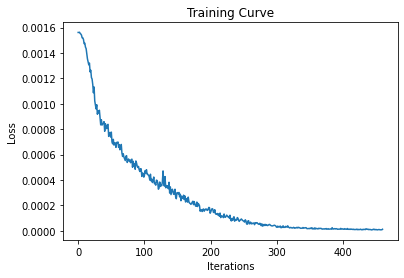

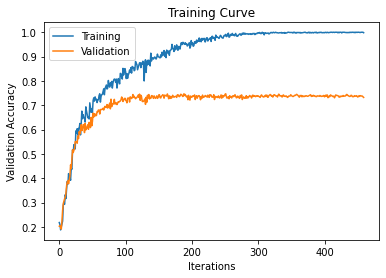

Final Training Accuracy: 0.9994900560938297
Final Validation Accuracy: 0.7321144674085851
Total time:   220.32 s  Time per Epoch:  11.02 s 


In [112]:
use_cuda = True

model =CNNClassifier4()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

# Prepare Dataloader
batch_size = 1024
num_workers = 1
train_feature_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_feature_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_feature_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

#proper model
train2(model, train_feature_loader, val_feature_loader, num_epochs=20)

In [113]:
x, y = get_accuracy(model, train_feature_loader, conf_matrix=True)
print(x)
print_conf_matrix(y)

0.9994900560938297



	cloudy	foggy	rain	snow	sunny	

cloudy	5112.0	0.0	0.0	0.0	0.0	

foggy	0.0	4096.0	1.0	3.0	0.0	

rain	0.0	1.0	4719.0	0.0	0.0	

snow	0.0	7.0	0.0	4821.0	0.0	

sunny	0.0	0.0	0.0	0.0	4772.0	



In [114]:
x, y = get_accuracy(model, val_feature_loader, conf_matrix=True)
print(x)
print_conf_matrix(y)

0.7321144674085851



	cloudy	foggy	rain	snow	sunny	

cloudy	184.0	19.0	15.0	11.0	44.0	

foggy	12.0	184.0	8.0	11.0	4.0	

rain	36.0	18.0	168.0	19.0	12.0	

snow	9.0	13.0	16.0	208.0	12.0	

sunny	52.0	5.0	12.0	9.0	177.0	



In [115]:
x, y = get_accuracy(model, test_feature_loader, conf_matrix=True)
print(x)
print_conf_matrix(y)

0.7513812154696132



	cloudy	foggy	rain	snow	sunny	

cloudy	189.0	4.0	21.0	8.0	53.0	

foggy	15.0	183.0	7.0	12.0	4.0	

rain	37.0	10.0	185.0	9.0	13.0	

snow	10.0	11.0	15.0	214.0	10.0	

sunny	51.0	5.0	9.0	11.0	181.0	

